In [104]:
import numpy as np
import itertools

# num = number of ranks
# N = length of each rank
def generateMallowsSet(num, N, eta, centroid=0):
    if centroid == 0:
        centroid = np.arange(N)
    list = []
    for _ in range(num):
        ord = np.arange(N)
        ord[0] = centroid[0]
        for i in range(1, N):
            ord[i] = centroid[i]
            j = i
            while (eta > np.random.uniform(0.0,1.0) and j >= 1):
                ord[j], ord[j-1] = ord[j-1], ord[j]
                j -= 1

        list.append(ord)
    return list

In [105]:
data = generateMallowsSet(2,3,0.8)
data

[array([2, 1, 0]), array([2, 0, 1])]

In [106]:
def np_index(array, value):
    return np.where(array==value)[0][0]

In [107]:
def ktdistanceSOI(a, b):
    pairs = itertools.combinations(a, 2)
    count = 0.0
    for i, j in pairs:
        print('-----',i, j)
        half = False
        first = np_index(a, i) - np_index(a, j)
        print(first, np_index(a, i))
        try:
            secnd = np_index(b, i) - np_index(b, j)
        except:
            half = True
            count += 0.5
        if not half and (first * secnd < 0):
            count += 1
    return count

In [108]:
ktdistanceSOI(data[0],data[1])

----- 2 1
-1 0
----- 2 0
-2 0
----- 1 0
-1 1


1.0

In [123]:
r = 0.0
central = np.arange(12)
kt = []
while r < 1.0:
    data = generateMallowsSet(1000, 12, r)
    kt_sum = 0
    for d in data:
        kt_sum += ktdistance(central, d)
    kt.append((r, kt_sum/1000.0))
    r += 0.05
    


In [124]:


kt

[(0.0, 0.0),
 (0.05, 0.577),
 (0.1, 1.261),
 (0.15000000000000002, 1.843),
 (0.2, 2.656),
 (0.25, 3.48),
 (0.3, 4.48),
 (0.35, 5.628),
 (0.39999999999999997, 6.87),
 (0.44999999999999996, 8.309),
 (0.49999999999999994, 10.05),
 (0.5499999999999999, 12.105),
 (0.6, 14.466),
 (0.65, 16.894),
 (0.7000000000000001, 20.348),
 (0.7500000000000001, 24.418),
 (0.8000000000000002, 29.322),
 (0.8500000000000002, 35.389),
 (0.9000000000000002, 43.393),
 (0.9500000000000003, 53.302)]

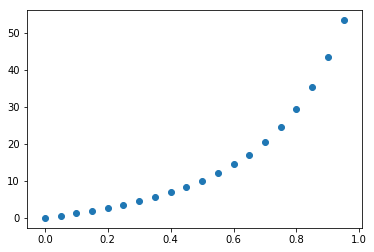

In [125]:
import matplotlib.pyplot as plt
x,y = zip(*kt)
plt.scatter(x,y)
plt.show()